# A Data-Driven Approach to Job Discrimination Law
## CS481 Assignment 1
This assignment will place you and your team in the posture of a newly formed partnership between SprawlMart's legal and engineering departments.  We have read of rising concerns over the potentially discriminatory behavior of certain algorithmic hiring tools and now you'll be expected to address these concerns from technical, legal, and business perspectives.  SprawlMart's CEO and General Counsel have become increasingly wary of potential probes from the EEOC into its latest adoption of algorithmic hiring practices.  Moreover, apart from potential liability from the feds, a whole host of state legislatures have passed or begun to consider laws regulating the use of automated evaluation algorithms demanding explainability and transparency among other measures. 

Your team of Stanford-trained lawyers and engineers have been tasked with the job of analyzing potential problems in the latest dataset of candidates applying for SprawlMart's coveted Entry-Level Business/Data Analyst Position. You will be tasked with analyzing the liability risks that the company faces and prototyping a system that shields the corporation from those risks while balancing other key corporate objectives.

### Learning Goals:
* Gain basic command over concepts in data science and machine learning as it relates to legal statutes. 
* Gain a robust understanding of where technical tools can be used as leverage to demonstrate liability under particular statutes - in this case job discrimination law. 

Note to self:  Was trying to say something along the lines of don't feel overwhelmed, and encourage folks to contribute and help others with what they're good at but couldn't quite phrase it right...

An aside:  One of the most exciting characteristics of this class is its diversity - this cohort ranges from C.S. PhDs developing improvements in Generative Adversarial Networks to first-year Law Students well-versed in contract and tort law, to second-year English major undergrads writing prose.  We are well aware that teaching a law class in the medium of a jupyter notebook is foreign and new.  For those worried about what programming knowledge which might be required, we did not expect that you came into this class with a technical background - only that you desired to gain some of those basic skills.  If at any point, you struggle with figuring out how something in the code is working, what is being written, or just require greater clarity over what is happening from a technical viewpoint, please do not hesitate to ask for help.  For those of you who are well-versed in data science, programming, machine learning, we imagine that you came here not to learn basic skills you already know deeply but likely to learn and grapple with the interesting legal puzzles and questions that arise at the intersection of the systems you build and the laws of the land. In sum, we hope that this will be a rich experience, where every party not only gains valuable skills but also has the opportunity to demonstrate their own skillset and assist their teammates. If at any point you feel that is not the case please offer your feedback! 


## Assignment Overview
#### There will be 3 milestones to this assignment. 
1. Studying a proprietary dataset of candidates for potential legal liability under Job Discrimination statutes.  

2. Building a compliant hiring algorithm that meets compliance measures and corporate objectives.  

3. Analyzing performance, and considering the legal implications of fairness-correcting measures. 


### Milestone 1:  Analyzing the Data for Legal Liability 
To start your team's analysis and task, you've been handed the latest dataset of 500 candidates being evaluated for the next cohort of entry-level business analysts.  Moreover, along with the datset HR's engineering team has also kindly shared with you three basic algorithms they've used in the past to evaluate candidates.  In practice, the inclusion of this automated system is planned for use in the initial evaluation phrase, prior to any in-person interviews.  Those scoring in the top 30% will move on to the next phase of evaluation by an actual recruiter. 

Recall that under the existing federal statutes - there exists three evidentiary frameworks to detect discriminatory intent: direct, indirect, and statistical. ([Brookings](https://www.brookings.edu/research/assessing-employer-intent-when-ai-hiring-tools-are-biased/)).  We will focus on statistical evidence although we encourage you to repeatedly consider other potential sources of liability.  As discussed in lecture, the EEOC has adopted a 4/5ths rule of thumb to quantify a "substantially different rate of selection" that could lend to liability risk under the Title VII apart from a demonstration of business necessity (NEEDS CITATION). The courts have generally upheld the rule.  

The 4/5ths rule states that if the selection rate for a certain group (X) is less than 80 percent of that of the group with the highest selection rate (Y), there is adverse impact on that group (X). [Types of Employment Discrimination](https://www.justice.gov/crt/types-employment-discrimination) 


#### Learning goals for this Milestone
##### Job Discrimination Law
* Acquire a deep understanding of where liability under the EEOC's 4/5ths rule may apply in the context of job discrimination.

##### A Basic Technical Toolset
* A basic but fundamental and actionable understanding of how data is used to make predictions
* Learn how legal standards of liability connect with the analysis of datasets.
* Exposure to more modern data sources for job evaluation, corresponding evaluation algorithms and their legal risk.

## Task 1: Setting up our Analysis Pipeline

Let's first load in the dataset that was sent to us and analyze its contents.  

For those unfamiliar: We are using the progamming language Python!  It is an interpreted, high-level, general-purpose programming language. it emphasizes code readability and excels for coding applications in data science and machine learning!  We will be using a number of packages in python (think of them as additional applications, programs), to help us perform some of the tasks we need to do.



In [80]:
import nbimporter
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import walmartDataset
import hiringAlgorithms
from IPython.display import Image

### The Dataset:
* This dataset holds 500 individuals, carrying 22 data points on each of them.  Each of these data points are encoded in distinct manners ranging from minutes for commute time, to continuous GPA values, to discrete numbers on a scale for different skill scores.  
* Each of the features can be seen below - think of the following as querying for those features that you're about to see defined!

In [23]:
features = ["Names", "GPA", "Avg Commute Time", "Cultural Fit", "Technical Aptitude", 
           "Soft Skills", "Employee Referral", "Years of Experience", "Leadership Capability", 
           "Race", "Sex", "Age", "Birth Origin", "Education", 
           "Undergraduate Degree", "Educational Prestige", "Sports", "Criminal Record",
           "Arrest Records", "LinkedIn Score", "Responsible Social Media Use", "HireVue Score"]
numCandidates = 500
dataset = walmartDataset.loadDataset(numCandidates, features)

Loading the dataset .... this might take a few seconds!
500
500
500
500
500


In [75]:
dataset.to_csv("dataset.csv")
dataset

,Names,GPA,Avg Commute Time,Cultural Fit,Technical Aptitude,Soft Skills,Employee Referral,Years of Experience,Leadership Capability,Race,...,Birth Origin,Education,Undergraduate Degree,Educational Prestige,Sports,Criminal Record,Arrest Records,LinkedIn Score,Responsible Social Media Use,HireVue Score
0,Letha Smiley,2.800794,106.902301,0,1,0.0,0.0,3.0,0.600008,0,...,United States,2,Sciences,2,Club/Intramural,0.0,0.0,0,1.0,1
1,John Nixon,3.182947,36.582129,0,0,1.0,0.0,3.0,0.536410,0,...,United States,1,Quantitative,2,None,0.0,0.0,0,1.0,1
2,Charles Frazier,3.356950,40.290813,1,1,0.0,0.0,4.0,0.774140,0,...,China,1,Humanities,2,None,0.0,0.0,1,1.0,0
3,Christopher Moore,2.075730,47.847798,1,3,0.0,0.0,3.0,0.655039,0,...,United States,1,Engineering,1,None,0.0,0.0,2,1.0,1
4,Zachariah Yashinski,3.098780,15.412124,1,3,0.0,1.0,5.0,0.547381,4,...,Canada,1,Engineering,1,None,0.0,0.0,0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Joann Oconnor,3.050289,101.147952,1,3,1.0,0.0,4.0,0.355593,0,...,United States,1,Engineering,2,Club/Intramural,0.0,0.0,0,1.0,2
496,Richard Doucet,3.731152,92.427115,2,4,0.0,0.0,5.0,0.076824,0,...,United States,1,Quantitative,2,None,0.0,0.0,1,1.0,0
497,Deborah Brown,2.833075,42.965947,0,4,0.0,0.0,2.0,-0.072707,0,...,United States,2,Sciences,2,Club/Intramural,0.0,0.0,0,1.0,1
498,Frances Collins,2.862344,6.264908,1,0,0.0,0.0,1.0,0.671263,4,...,United States,1,Quantitative,2,None,0.0,0.0,1,1.0,0


#### Q1: Warmup:  Familiarizing ourselves with the data (Estimated Time: 1 hr)
Anyone who works with data knows that one of the most important, if not the most important, aspects of working with it is knowing your dataset very well - what features there are, how they are encoded, what imbalances exist, and more. 

1.  How are each of these features currently encoded in the dataset? Try defining the domain of each feature. (If it is not clear for one of the features - hypothesize and point it out in your response).

2.  What features currently, are the most worrisome to you from the viewpoint of incurring liability - please refer specifically to the state and federal statutes we have discussed in class.

3. Are there ways in which particular features were encoded, that seem problematic to you?  If so, how would you recommend re-encoding them?  (Think explainability standards/statutes).

4.  Now, explain how those very same features would be critical to Walmart's HR team in its selection process.  Cast your response in terms of the business necessity defense we discussed. 

5.  Can you detect any imbalances with the data? If so, please specify them in detail. A data imbalance is where the distribution of values within a given field is uneven.  One obvious one here is gender! (1-2 sentences per scenario)

6. Merging your team's legal thinking cap with your algorithmic experience - provide three scenarios in which the data imbalances you found could plausibly lead to algorithmic outputs which seem to violate the statutes we have discussed.  (Expected Length: Paragraph per scenario)


## Task 2: Analyzing the prototyped models

### The Models

Now that you've familiarized yourself with the dataset and gained an intuition over potential worries, 
lets test your concerns with some of the models the HR Engineering team has provided you with 

#### The 3 Models:

* A Ranking Model
* A Nearest Neighbor Model
* A Basic Neural Network Model


#### Lets start with the ranking model!
* This is about as simple as it can get for trying to evaluate candidates.
* Here's how it works
    * Select features to rank candidates based on
    * Determine weights for each of the features
    * Take the sum of those values ==> that's their score
    * Rank the candidates based on their score
    * Impose a percentile cutoff - everyone above the cutoff makes it past the algorithmic evaluation round! 
    


In [5]:
# --------------------------------- Guide -------------------------------#
# These are the different "scores" we can calculate based on the candidates
# datapoints.  We will start off using these three to evaluate this basic
# ranking model approach.  Then you'll be asked to create your own 
# score formula and assess its compliance with the 4/5ths rule.

def combo1(row):
    return row["GPA"] + row["Employee Referral"] + row["Soft Skills"] + row["Leadership Capability"] + row["Cultural Fit"]
    
def combo2(row):
    return row["Technical Aptitude"] + row["Educational Prestige"] + row["HireVue Score"] + row["Avg Commute Time"]    

def combo3(row):
    return row["HireVue Score"] + row["Linkedin Score"] + row["Cultural Fit"]


In [40]:
# --------------------------------- Guide -------------------------------#
# As discussed above we pick numeric weights for each of the datapoints we've 
# found. Each weight is selected to demonstrate the relative importance 
# of that particular datapoint to us in the score calculation.  
# Note that because our score formula does not include all the weights
# The only weights that are relevant to us are the ones whose fields
# are in the score formula.

weights = {
    "GPA": 1.0,
    "Avg Commute Time": .5,
    "Cultural Fit": .6, 
    "Technical Aptitude": 1.0,
    "Soft Skills": .8,
    "Employee Referral": 0.9,
    "Years of Experience": 1.0,
    "Leadership Capability": .8,
#     "Race": 0,
#     "Sex": 0,
#     "Age": 0,
#     "Birth Origin": 0,
    "Education": .7,
#     "Undergraduate Degree": 1.0,
    "Educational Prestige": .9,
#     "Sports": .5,
    "Criminal Record": -2,
    "Arrest Records": -1,
    "LinkedIn Score": .4,
    "Responsible Social Media Use": .5,
    "HireVue Score": 1.5
}



In [42]:
# --------------------------------- Guide -------------------------------#
# For those of you totally new to programming these are functions.  
# Functions take in certain outputs, do some manipulation, math, or other
# set of operations and spit out an output.  The first function you here
# takes our dataset and tries to put the fields that are not in a [0, 1]
# range into a zero to one range.  This is so that each of the fields are 
# relatively comparable.  This of course has the effect of distorting
# our data, but it enables our score calculation to not be totally
# affected by simply average commute time since its numeric is so much larger
# The second function applies those weights we came up with above to our
# dataset, then uses our score formula we chose to rank the candidates in
# the dataset!

def convertToScores(dataframe):
   # Done manually right now which is not optimal but what can I do
    df = dataframe.copy()
    df["GPA"] = df["GPA"].apply(lambda x: x / 4)
    df["Avg Commute Time"] = df["Avg Commute Time"].apply(lambda x: (100 - x) / 100)
    df["Technical Aptitude"] = df["Technical Aptitude"].apply(lambda x: x / 4)
    df["Educational Prestige"] = df["Educational Prestige"].apply(lambda x: x /3)
    df["LinkedIn Score"] = df["LinkedIn Score"].apply(lambda x: x /2)
    df["HireVue Score"] = df["HireVue Score"].apply(lambda x: x / 2)
    return df

def weightAndRank(dataframe, weights, criteria):
    df = dataframe.copy()
    for key, value in weights.items():
        df[key] = df[key].apply(lambda x: value *x)
    df["scores"] = df.apply(criteria, axis=1)
    df = df.sort_values(["scores"], ascending=False)
    return df

In [78]:
# Here we go ahead and execute or run the functions!
scoredDataset = convertToScores(dataset)
scoredDataset.to_csv("scoredDataset.csv") #This creates a .csv file
cutoff = .20 # We're selecting the top 20 percent scoring candidates!
criteria = combo1 
numCandidates = int(cutoff*500)
rankingResults = weightAndRank(scoredDataset, weights, criteria)
qualifyingCandidates = rankingResults.iloc[:numCandidates]

100
GPA
Avg Commute Time
Cultural Fit
Technical Aptitude
Soft Skills
Employee Referral
Years of Experience
Leadership Capability
Education
Educational Prestige
Criminal Record
Arrest Records
LinkedIn Score
Responsible Social Media Use
HireVue Score


The selection rate for Asians:  0.14
The selection rate for Caucasians:  0.2057142857142857


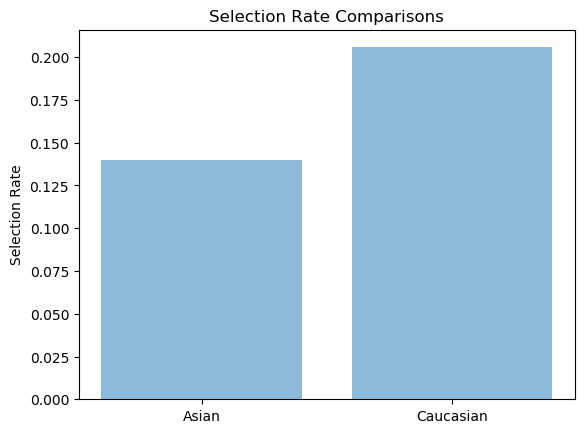

In [70]:
# --------------------------------- Guide -------------------------------#
# Alright, we've successfully run our ranking algorithm and have applied the
# cutoff.  Now it's time to visualize the selection rates, which is what
# the bottom does for us.  The selection rate for a particular race
# is defined by taking the
# (# of individuals of race selected) / (# of individuals of that race)
# We can then use the function shown below to compare and visualize the 
# selection rate for any two races you choose.
def graphSelectionRateByEthnicity(numCandidates, numQualified, race1, race2, raceIndxs):
    selectionRate1 = numQualified[raceIndxs[race1]] / numCandidates[raceIndxs[race1]]
    selectionRate2 = numQualified[raceIndxs[race2]] / numCandidates[raceIndxs[race2]]
    print("The selection rate for " + race1 + "s: ",selectionRate1)
    print("The selection rate for " + race2 + "s: ",selectionRate2)
    y_pos = np.arange(2)
    performance = [selectionRate1, selectionRate2]
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, (race1, race2))
    plt.ylabel('Selection Rate')
    plt.title('Selection Rate Comparisons')
    plt.show()

raceIndxs = {"Caucasian": 0, "African-American": 1, "Asian": 2, "Hispanic": 3, "Other": 4}
qualifyingCandidates.to_csv("qualifyingCandidates.csv")
numCandidatesByRaces = rankingResults["Race"].value_counts()
numQualifiedByRaces = qualifyingCandidates["Race"].value_counts()
graphSelectionRateByEthnicity(numCandidatesByRaces, numQualifiedByRaces, 
                             "Asian", "Caucasian", raceIndxs)

#### Q2: Interrogating the ranking model (30mins - 45mins)
* For each of the feature sets given detail sources of liability based on your analyzing the model's performance. Please carefully distinguish and detail the claim and justification, providing visualizations of what you have found using the tools we have provided to you.

* Now, if you see the code above, we had initial weights for each of the different features we used to calculate the candidate's score.  Now try re-weighting each of the featureCombinations in a manner that you believe would resolve these claims.  Were you successful?

* Notice how our cutoff is right at the top 20th percentile.  What if we changed the cutoff score - how would the performance of the model shift?  Try increasing and decreasing the cutoff in margins of .05. Would we be able to reduce the risk of liability - how would this affect our other corporate objectives though?  

#### The Nearest Neighbor Model

We have 4 previous model employees that we've labelled in terms of their performance - their names are Jane, Oscar, John, and Beatrice. Jane is an excellent worker, Oscar is a good worker, John, is a satisfactory worker, and Beatrice was a poor worker. Moreover, we have the same 22 data points for each of them as we do for each of candidates. 

* This is how the model works:
    * Choose the data points we believe are most expressive of our 4 model employees' performance
    * For each of the candidates:
        * For each of the model employees
            * Calculate the "distance" between the candidate and the particular model employee
        * Pick out the label of model employee that has the least distance, is closest, to the candidate
        * Assign that label to the candidate.
    * Select all candidates with "excellent" predictions for the next round of interviews.


#### A few technical notes:
* If you're wondering what we mean by distance, please skim through this [article](https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d).  In some cases distance measures are very intuitive.  For example if Jane has a 3.9 GPA, and a candidate Sally has a 3.8 GPA.  There is little distance between these two  with regard to that measure.  But other times distance measures can be far less intuitive.  For example, consider how we've encoded race.  It seems really wacky, that one race can be more or less distant from another race. Think back to where you considered potential worries regarding some of the ways these features were encoded.  This is where those concerns might come up! 
* A second difficulty that comes into play is that given the distance measure/function we choose, different features will contribute more or less distance to the total calculation.


<tr>
  <td> Jane Abraham <img src="imgs/woman-wearing-black-eyeglasses-1239291.jpg" style="width:160px; height:160px;"/> </td>
  <td> Oscar Button <img src="imgs/adult-beard-boy-casual-220453.jpg" style="width:160px; height:160px;"/> </td>
  <td> John Grissom <img src="imgs/shallow-focus-photography-of-man-1300402.jpg" style="width:160px; height:160px;"/> </td>
  <td> Beatrice Lee <img src="imgs/closeup-photo-of-woman-with-brown-coat-and-gray-top-733872.jpg" style="width:160px; height:160px;"/> </td>
</tr>

In [84]:
#------------ Lets' Take a Look At Our Model Employee's Data... -----###
modelEmployees = pd.read_csv("modelEmployees.csv")
modelEmployees

,Names,GPA,Avg Commute Time,Cultural Fit,Technical Aptitude,Soft Skills,Employee Referral,Years of Experience,Leadership Capability,Race,...,Education,Undergraduate Degree,Educational Prestige,Sports,Criminal Record,Arrest Records,LinkedIn Score,Responsible Social Media Use,HireVue Score,Performance
0,Jane Abraham,4.000,45,1,1.00,0,1,3,0.800349,2,...,2,Sciences,3,Club/Intramural,0,0,0.0,1,2,4
1,Oscar Button,3.545,34,1,0.00,1,0,3,0.536410,0,...,1,Quantitative,2,None,0,0,0.0,1,1,3
2,John Grissom,3.652,90,0,0.75,1,0,4,0.774140,0,...,1,Humanities,1,None,0,1,0.5,0,0,2
3,Beatrice Lee,2.834,70,0,0.25,0,0,2,0.211230,0,...,1,Engineering,1,None,1,1,1.0,0,0,1


In [86]:
# ------------ Next we need to run Nearest Neighbors Algorithm ------------###
# Recall that the Nearest neighbor algorithm, takes one of the candidates, and compares
# it to each of the model employees and labels the candidate with the label
# of the model employee that have the least "distance" with
# To calculate the distance, we must again, choose the features we most care about.

dataFields = [
    "GPA",
    "Avg Commute Time",
    "Cultural Fit", 
    "Technical Aptitude",
    "Soft Skills",
    "Employee Referral",
    "Years of Experience",
    "Leadership Capability",
    "Education",
    "Educational Prestige",
    "Criminal Record",
    "Arrest Records",
    "LinkedIn Score",
    "Responsible Social Media Use",
    "HireVue Score"
]


In [106]:
#------------ Preparing our model ------------###
class NearestNeighbor(object):
    def __init__(self):
        pass
    
    def train(self, X, y):
        self.Xtr = X.to_numpy()
#         print(self.Xtr)
        self.ytr = y.to_numpy()
#         print(self.ytr)
    
    def predict(self, X):
        X = X.to_numpy()
        num_test = X.shape[0]
        print(num_test)
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)
        print(Ypred.shape)
        for i in range(num_test):
            distances = np.sum(np.abs(self.Xtr - X[i, :]), axis = 1)
            min_index = np.argmin(distances)
            Ypred[i] = self.ytr[min_index]
            
        return Ypred

In [107]:
# Similar story below as above where we convert to scores to make the datapoints
# relatively comparable.
X_train = convertToScores(modelEmployees)[dataFields]
y_train = modelEmployees["Performance"]
X_test = convertToScores(dataset)[dataFields]

In [111]:
nn_hiringAlg = NearestNeighbor()
nn_hiringAlg.train(X_train, y_train) 
candidateAssignments = nn_hiringAlg.predict(X_test)

500
(500,)


In [118]:
### -------------- Analyzing Results -----------------########
dataset["Performance"] = candidateAssignments
selectedCandidates = X_test[X_test["Performance"].isin([4])]
selectedCandidates

,GPA,Avg Commute Time,Cultural Fit,Technical Aptitude,Soft Skills,Employee Referral,Years of Experience,Leadership Capability,Education,Educational Prestige,Criminal Record,Arrest Records,LinkedIn Score,Responsible Social Media Use,HireVue Score,Performance
0,0.700198,-0.069023,0,0.25,0.0,0.0,3.0,0.600008,2,0.666667,0.0,0.0,0.0,1.0,0.5,4
4,0.774695,0.845879,1,0.75,0.0,1.0,5.0,0.547381,1,0.333333,0.0,0.0,0.0,1.0,1.0,4
5,0.647417,0.270705,1,0.50,0.0,0.0,2.0,0.231798,2,1.000000,0.0,0.0,0.0,1.0,0.0,4
11,0.839257,0.575215,1,1.00,0.0,0.0,4.0,0.713421,2,0.333333,0.0,0.0,0.0,1.0,0.0,4
19,0.873978,0.816892,2,0.00,0.0,0.0,2.0,0.271520,2,0.333333,0.0,0.0,0.5,1.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,0.760422,0.839396,0,0.25,0.0,1.0,2.0,0.191770,1,0.333333,0.0,0.0,0.5,1.0,1.0,4
490,0.846711,0.610365,0,0.50,0.0,1.0,4.0,0.567094,1,1.000000,0.0,0.0,0.0,1.0,0.0,4
494,0.849344,0.879504,0,0.25,0.0,0.0,3.0,0.394170,2,1.000000,1.0,1.0,0.5,1.0,1.0,4
497,0.708269,0.570341,0,1.00,0.0,0.0,2.0,-0.072707,2,0.666667,0.0,0.0,0.0,1.0,0.5,4


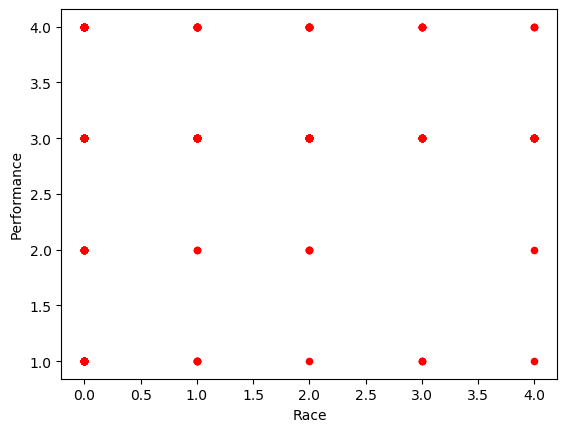

In [119]:
# def
#     dataset.loc[dataset["Race"]]
# dataset.plot(kind='scatter',x='Race',y='Performance',color='red')
# plt.show()

#### Q3: Interrogating the Nearest Neighbor Model (1 hr)
* Based on the resultant selections, detail any sources of liability you find based on your analyzing the model's performance. Please carefully distinguish and detail the claim and justification, providing visualizations of what you have found using the tools we have provided to you.
    * In addition to analyzing the candidates who received positive "excellent" and "good" labels, consider who received "poor" labels.  What patterns do you notice?
    
* Suppose you found no 4/5ths violation with respect to those who were selected but it was clear that there was disparity in those who were not selected.  Would it be possible to formulate a Title VII claim under those circumstances?  If so how might you articulate the claim. Use evidence from the previous question. 

* Give the model employees and the algorithm presented - please explain how this bias is arising.  How are our model employees potentially contributing to the disparity?  How is the dataset contributing to the disparity?

* Try mitigating the 4/5ths bias for the candidates selected by changing the race of the excellent model employee. Analyze performance again.  Can you spot any new potential 4/5ths violation due to your change?  Additionally is it lawful to arbitrarily perform "data augmentation" or manipulation like this in the context of hiring algorithms?  Justify your response.

#### The Logistic Regression Model (45 mins)
Note to self: Hard to explain in just a block of text and also students don't need to know specifics.  Just want to use this as a vehicle for them to briefly learn about loss and optimization.  Present as something like - For an in-depth review of logistic regression and how this model functions please see this link. 
(We will construct a 15-min video or so for this)

Note to self:  Because logistic regression is more complex our goal here would just be to give law
    students a brief understanding of the foundations of neural networks and then just have them stick to more
    theoretical concerns with regard to the law.

Let's first train the model!

In [ ]:
# Students can visualize the loss and train test accuracy increasing.
let model = walmartDataset.fitLogRegModel()
plt.show()

In [ ]:
model.predict()
plt.show()

#### Q4: Interrogating the Logistic Regression Model
* Based on the resultant selections, detail any sources of liability you find based on your analyzing the model's performance. Please carefully distinguish and detail the claim and justification, providing visualizations of what you have found using the tools we have provided to you.
* Detail three ways you could try and alter the model's performance so as to mitigate the source of liability you found. (Answers here would be - adding in new training samples.  manually adjusting weights, changing the training samples, etc.).
* Compared to the ranking model - how might this model be superior for the task of selecting the best candidates? However, why still may it be a wise idea to stick with simpler models (think transparency)?


### Task 3: Alternative Sources of Data
The HR Engineering Team, aware of your comprehensive investigation and company-critical project is worried that the initial dataset given to you may be flawed.  Fortunately, they came across voice recordings of the 500 candidates that were saved from their HIreVue online interviews.  

While HireVue produces their own score available in the dataset, the team had begun to build a
deep Neural Network to conduct audio analysis and try to score the candidates using their own in-house algorithm.  

Here are a few samples of the audio recordings.

In [ ]:
audio_data = '/../../candidate1.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050
# Displays a play the audio button when run...
ipd.Audio(audio_data)

#### Q5:  Alternative Data Sources (15 mins)
* Based on what you heard in the audio samples, are there any new legal risks to deploying a hiring algorithm that anlyzes voice?
* Detail how under the ADA, a claim for employment discrimination could be brought against a candidate denied on the basis of results from a hiring algorithm analyzing voice.  
* What features would you want such an algorithm analyzing audio to pick onto as an employer?  What features might the algorithm pick up on that are worrisome from the standpoint of legal liability?

Great job!  Let's move onto Milestone 2 ... time to build your own compliant hiring algorithm!!! 